<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day21_XGBoost%EC%99%80_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21번째 이야기
- XGBoost와 LightGBM
- 하이퍼파라미터 튜닝
- 깃팀플 협업

In [ ]:
import pandas as pd
PATH = '/content/drive/MyDrive/datas/따릉이/train.csv'
data = pd.read_csv(PATH)

In [ ]:
# 전처리
# 모델
# 학습
# 성능평가
# 하이퍼파라미터 튜닝

In [ ]:
data.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
y = data.pop('count')
X = data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## XGBoost
## LightGBM

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

callbacks

In [ ]:
def say_hello():
  print('Hello')

In [ ]:
def many_work(callback):
  print('do something')
  callback()
  print('do something again')

In [ ]:
many_work(callback=say_hello)

do something
Hello
do something again


In [ ]:
def makegraph():
  print('Make Graph')

In [ ]:
def xgb_fit(callbacks=[]):
  print("machine learning")
  for callback in callbacks:
    callback()
  print("machine learning again")

In [ ]:
xgb_fit(callbacks=[makegraph])

machine learning
Make Graph
machine learning again


In [ ]:
# 성능측정
pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.8141704282967789

# LightGBM

In [ ]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()

In [ ]:
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgb_model.predict(X_test)

In [ ]:
r2_score(y_test, pred)

0.8310645011368452

In [ ]:
lgb_model.feature_importances_

array([347, 455, 418,  26, 286, 269, 271, 332, 342, 254], dtype=int32)

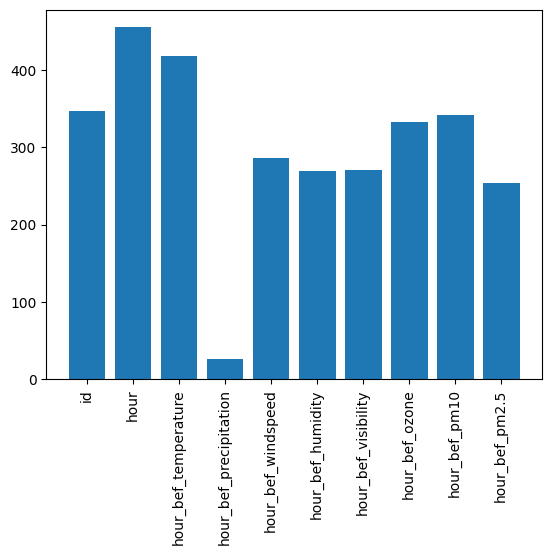

In [ ]:
import matplotlib.pyplot as plt
plt.bar(data.columns, lgb_model.feature_importances_)
plt.xticks(rotation=90);

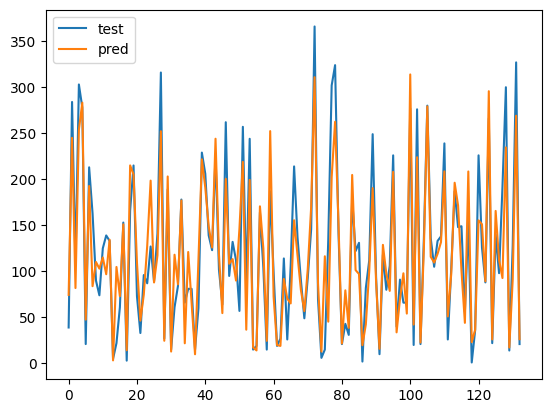

In [ ]:
plt.plot(y_test.to_numpy(), label='test')
plt.plot(pred, label='pred')
plt.legend()

# 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# hyper parameters
param_grid = {
    'learning_rate':[0.01,0.03, 0.05,0.1],
    'max_depth': [3,5,7,9,11],
    'min_child_weight':[1,3,5],
    'subsample':[0.5,0.7,1],
    'colsample_bytree':[0.5,0.7,1]
}

In [ ]:
xgb_model = XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, scoring='r2', cv=3, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_child_weight': [1, 3, 5],
                         'subsample': [0.5, 0.7, 1]},
             scoring='r2', verbose=1)

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 11,
 'min_child_weight': 3,
 'subsample': 1}

In [ ]:
grid_search.best_score_

0.783894442738327

In [ ]:
tmp = {'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 11,
 'min_child_weight': 3,
 'subsample': 1}

In [ ]:
xgb_model=XGBRegressor(**tmp, n_estimators=10000,early_stopping_rounds=100)

In [ ]:
xgb_model.fit(X_train, y_train,eval_set=[(X_test, y_test)], verbose=1)

[0]	validation_0-rmse:136.33600
[1]	validation_0-rmse:125.35508
[2]	validation_0-rmse:114.61658
[3]	validation_0-rmse:105.30026
[4]	validation_0-rmse:96.60461
[5]	validation_0-rmse:89.79567
[6]	validation_0-rmse:82.78987
[7]	validation_0-rmse:77.77007
[8]	validation_0-rmse:72.56606
[9]	validation_0-rmse:68.99498
[10]	validation_0-rmse:65.03519
[11]	validation_0-rmse:61.34047
[12]	validation_0-rmse:58.05095
[13]	validation_0-rmse:55.36959
[14]	validation_0-rmse:53.21690
[15]	validation_0-rmse:50.92132
[16]	validation_0-rmse:49.13470
[17]	validation_0-rmse:47.58361
[18]	validation_0-rmse:46.57695
[19]	validation_0-rmse:44.97151
[20]	validation_0-rmse:43.85157
[21]	validation_0-rmse:43.03354
[22]	validation_0-rmse:42.30298
[23]	validation_0-rmse:41.68544
[24]	validation_0-rmse:41.01091
[25]	validation_0-rmse:40.47637
[26]	validation_0-rmse:40.11407
[27]	validation_0-rmse:39.82308
[28]	validation_0-rmse:39.43890
[29]	validation_0-rmse:39.13835
[30]	validation_0-rmse:38.91417
[31]	validatio

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred = xgb_model.predict(X_test)

In [ ]:
r2_score(y_test, pred)

0.8237623896668476

In [ ]:
# 하이퍼파라미터 그리드
param_grid = {
 'learning_rate': [0.01, 0.05, 0.1],
 'num_leaves': [31, 62, 93],
 'min_data_in_leaf': [20, 30, 40],
 'max_depth': [3, 5, 7],
 'subsample': [0.5, 0.7, 1],
 'colsample_bytree': [0.5, 0.7, 1],
}


In [ ]:
# 모델 및 GridSearchCV 객체 생성
model = LGBMRegressor()
grid_search = GridSearchCV(model, param_grid,
scoring='r2', cv=3, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be igno

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'min_data_in_leaf': [20, 30, 40],
                         'num_leaves': [31, 62, 93],
                         'subsample': [0.5, 0.7, 1]},
             scoring='r2', verbose=1)

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_data_in_leaf': 20,
 'num_leaves': 62,
 'subsample': 0.5}

In [ ]:
grid_search.best_score_

0.7697568679454637

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/datas/train.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.loc[[1,2,3]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
import numpy as np
a = np.array([1,1,0])
b = np.array([0,1,0])

In [ ]:
indices = np.nonzero(a==b)

In [ ]:
list(indices[0])

[1, 2]

In [ ]:
data.loc[indices[0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 깃 실습 팀플 미팅합시다
- 준비된 팀은 이야기 해주세요